In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset.head()

NameError: name 'dataset' is not defined

In [3]:
dataset = pd.read_csv('Salary_Data.csv')
##Preprocess
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

FileNotFoundError: [Errno 2] File b'Salary_Data.csv' does not exist: b'Salary_Data.csv'

In [6]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
X_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

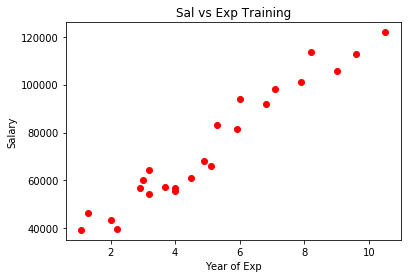

In [11]:
plt.scatter(X_train,y_train,color='red')
plt.title("Sal vs Exp Training")
plt.xlabel("Year of Exp")
plt.ylabel("Salary")
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
#y_train = bo + b1 * X_train
# y = c + mx
#Salary = 26780.0 + 9312 * Exp.

In [16]:
regressor.coef_

array([9312.57512673])

In [17]:
regressor.intercept_

26780.099150628186

In [18]:
y_pred = regressor.predict(X_test)

In [19]:
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [21]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431.])

In [22]:
y_test - y_pred

array([-3017.96184072,  -308.62295594, -7880.65717022,   118.85785513,
        1719.43714544,  1631.49724683])

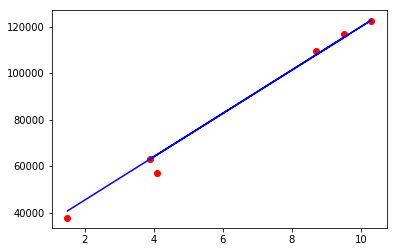

In [24]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,regressor.predict(X_test),color='blue')

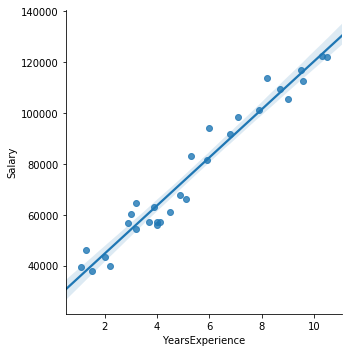

In [25]:
import seaborn as sns
sns.lmplot(x='YearsExperience',y='Salary',data=dataset,fit_reg=True)

In [29]:
## Mean Square Error
mse = np.mean((y_pred - y_test) ** 2)

In [30]:
np.sqrt(mse)

3580.979237321345

In [31]:
X_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

In [32]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431.])

In [34]:
regressor.score(X_test,y_test)

0.988169515729126

# Mutliple Linear Regression

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
dataset = pd.read_csv('50_Startups.csv')

In [36]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [41]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,4].values

In [43]:
X[:5]

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida']], dtype=object)

In [44]:
y[:5]

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94])

In [46]:
dataset['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X = LabelEncoder()
X[:,3] = labelencoder_X.fit_transform(X[:,3])
onehotencoder = OneHotEncoder(categorical_features=[3])
X = onehotencoder.fit_transform(X).toarray()

In [49]:
float_formatter = lambda x: "%.2f" % x
X_list = []
for i in range(len(X)):
    x_level1 = []
    for j in range(5):
        x_level1.append(float_formatter(X[i][j]))
    X_list.append(x_level1)

In [52]:
X_list[:6]

[['0.00', '0.00', '1.00', '165349.20', '136897.80'],
 ['1.00', '0.00', '0.00', '162597.70', '151377.59'],
 ['0.00', '1.00', '0.00', '153441.51', '101145.55'],
 ['0.00', '0.00', '1.00', '144372.41', '118671.85'],
 ['0.00', '1.00', '0.00', '142107.34', '91391.77'],
 ['0.00', '0.00', '1.00', '131876.90', '99814.71']]

In [53]:
X = X[:,1:]

In [54]:
X[:6]

array([[0.0000000e+00, 1.0000000e+00, 1.6534920e+05, 1.3689780e+05,
        4.7178410e+05],
       [0.0000000e+00, 0.0000000e+00, 1.6259770e+05, 1.5137759e+05,
        4.4389853e+05],
       [1.0000000e+00, 0.0000000e+00, 1.5344151e+05, 1.0114555e+05,
        4.0793454e+05],
       [0.0000000e+00, 1.0000000e+00, 1.4437241e+05, 1.1867185e+05,
        3.8319962e+05],
       [1.0000000e+00, 0.0000000e+00, 1.4210734e+05, 9.1391770e+04,
        3.6616842e+05],
       [0.0000000e+00, 1.0000000e+00, 1.3187690e+05, 9.9814710e+04,
        3.6286136e+05]])

In [55]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=0)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
regressor = LinearRegression()

In [58]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
regressor.coef_

array([ 5.92663381e+03, -3.38231256e+02,  8.28371991e-01,  5.03972419e-02,
        2.21861926e-02])

In [60]:
regressor.intercept_

39148.68850233828

In [61]:
y_pred = regressor.predict(X_test)

In [62]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94,  96778.92,  96479.51,
       105733.54,  96712.8 , 124266.9 , 155752.6 , 132602.65])

In [63]:
y_pred

array([111616.64259452, 132709.39466315, 140155.11033792,  76099.20398184,
       186329.9424037 , 112822.19807255,  63002.00394805,  99107.10428092,
       119287.75473382, 175522.83864738, 101000.698615  ,  85772.99293235,
       117713.76481526,  90230.88085202, 133375.04389451, 167530.54765828,
       158013.54602062])

In [64]:
np.sqrt(np.mean((y_test-y_pred) ** 2))

10878.81085732876